In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense, ReLU
from tensorflow.keras.layers import Embedding, BatchNormalization, Concatenate
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [3]:
train_df=pd.read_csv('data/Stress_1.txt',delimiter=';',header=None,names=['text','label'])
stress_df=pd.read_csv('data/Stress.csv')

In [4]:
# Mapping dictionary
label_mapping = {'sadness': 1, 'fear': 1, 'anger': 1,'love':0,'joy':0,'surprise':0}

# Replace labels with 1 and others with 0
train_df['label'] = train_df['label'].replace(label_mapping)
train_df['label'].fillna(0, inplace=True)

train_df

/var/folders/yd/pz_sq3ls22x4rx6d_hv1svw80000gn/T/ipykernel_4140/2326214050.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['label'] = train_df['label'].replace(label_mapping)
/var/folders/yd/pz_sq3ls22x4rx6d_hv1svw80000gn/T/ipykernel_4140/2326214050.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origin

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,0
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,1
15996,i am now turning and i feel pathetic that i am...,1
15997,i feel strong and good overall,0
15998,i feel like this was such a rude comment and i...,1


In [5]:
train_df
stress_df=stress_df.iloc[:,3:5]



In [6]:
train_df

,text,label
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,0
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,1
15996,i am now turning and i feel pathetic that i am...,1
15997,i feel strong and good overall,0
15998,i feel like this was such a rude comment and i...,1


In [7]:
stress_df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [8]:
merged_df = pd.concat([stress_df,train_df],ignore_index=True)
merged_df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
18833,i just had a very brief time in the beanbag an...,1
18834,i am now turning and i feel pathetic that i am...,1
18835,i feel strong and good overall,0
18836,i feel like this was such a rude comment and i...,1


In [9]:
import pandas as pd

# Assuming 'merged_dataset' is your merged DataFrame
duplicates = merged_df.duplicated().sum()

print(f"Number of duplicate rows in the dataset: {duplicates}")

#if duplicates > 0:
    # Optionally, you can drop these duplicates
   # merged_dataset = merged_dataset.drop_duplicates()
   # print("Duplicates dropped.")


Number of duplicate rows in the dataset: 40


In [10]:
# Display all duplicate rows in the DataFrame, excluding the first occurrence
duplicate_rows = merged_df[merged_df.duplicated(keep='first')]

# If you want to see all occurrences of duplicate rows, including the first occurrence, use keep=False
# duplicate_rows = merged_dataset[merged_dataset.duplicated(keep=False)]

print(duplicate_rows)

# Optionally, to see only a specific number of duplicates, you can use
# print(duplicate_rows.head(n)) where 'n' is the number of duplicates you wish to see


                                                    text  label
744    7. This study will include only participants w...      0
1220   If you have a survey you would like to share w...      0
1661   7. This study will include only participants w...      0
1746   Help me network, help me find a room, please! ...      1
1872   I'm new to this so please forgive me. I'm not ...      1
1905   Can you contribute your story alongside others...      0
2092   Hello, You are invited to complete a survey fo...      0
2099   The current study explores the experience of y...      0
2190                                              #NAME?      1
2375   Hello, You are invited to complete a survey fo...      0
2408   Hello, You are invited to complete a survey fo...      0
2455   Your responses to the survey items will be ano...      0
2563                                              #NAME?      0
2704   Your responses to the survey items will be ano...      0
2783   If you were raped on a daily basi

In [11]:
# This removes the duplicates except for the first occurrence
merged_df_clean = merged_df.drop_duplicates(keep='first')

# If you want to remove all instances of duplicates (not keeping any of the duplicates), you can use
# merged_dataset_clean = merged_dataset.drop_duplicates(keep=False)


In [12]:
train_df['label'].unique()

array([1, 0])

In [13]:
train_df.label.value_counts()

label
1    8762
0    7238
Name: count, dtype: int64

In [14]:
# Display unique values in the 'label' column
unique_labels = merged_df_clean['label'].unique()
print("Unique labels in the dataset:", unique_labels)

# If labels are strings and you know their exact names you can skip this step.
# If labels are numbers, you might already have a mapping to know which number corresponds to "surprise" and "love".


Unique labels in the dataset: [1 0]


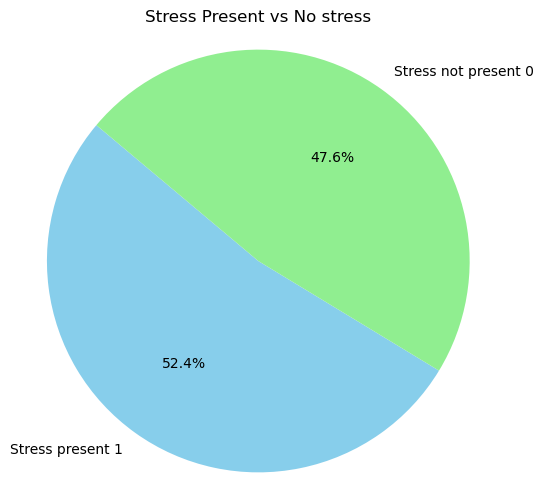

In [16]:
import matplotlib.pyplot as plt

# Sample binary dataset
labels = ['Stress present 1', 'Stress not present 0']
sizes=[sum(1 for label in stress_df['label'] if label == 1),sum(1 for label in stress_df['label'] if label == 0)]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Stress Present vs No stress')

# Show plot
plt.show()

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(merged_df_clean['text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(merged_df_clean['text'])

# Pad the sequences so they all have the same length
max_length = max(len(x) for x in sequences)  # You might choose to set a specific max_length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [18]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical
labels = to_categorical(merged_df_clean['label'])


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(24, activation='relu'),
    Dropout(0.2),
    Dense(len(labels[0]), activation='softmax')  # Adjust the number of units based on the number of labels
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 310, 16)           80000     
                                                                 
 lstm (LSTM)                 (None, 310, 64)           20736     
                                                                 
 dropout (Dropout)           (None, 310, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 5

2024-04-01 15:59:39.973425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-01 15:59:39.979038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-01 15:59:39.981511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [21]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


2024-04-01 15:59:44.268442: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-01 15:59:44.376281: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-01 15:59:44.376882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-01 15:59:44.377597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

470/470 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.5466

2024-04-01 16:00:47.306829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-01 16:00:47.307532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-01 16:00:47.308383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

470/470 [==============================] - 67s 139ms/step - loss: 0.6894 - accuracy: 0.5466 - val_loss: 0.6912 - val_accuracy: 0.5327
Epoch 2/20
470/470 [==============================] - 65s 138ms/step - loss: 0.6890 - accuracy: 0.5477 - val_loss: 0.6913 - val_accuracy: 0.5327
Epoch 3/20
442/470 [===========================>..] - ETA: 3s - loss: 0.6890 - accuracy: 0.5472

KeyboardInterrupt: 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Variables as per your preprocessing details
max_words = 10000  # Vocabulary size
max_len = 50       # Maximum sequence length
embedding_dim = 32 # Embedding dimension size

# For a binary classification, the number of categories is 2
num_categories = 2

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    SpatialDropout1D(0.2),
    LSTM(64, dropout=0.2),  # Note: If running on a GPU and encountering issues, you might need to remove 'recurrent_dropout'
    Dense(num_categories, activation='softmax')  # Use 'sigmoid' activation if you're outputting a single output unit for binary classification
])

# For binary classification, you can use 'binary_crossentropy' as the loss function if you have a single output unit.
# Since we're using 2 output units and 'softmax', we'll stick with 'categorical_crossentropy'.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            320000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 32)           0         
 ropout1D)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 344,962
Trainable params: 344,962
Non-trainable params: 0
_________________________________________________________________


2024-04-01 16:02:59.991641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-01 16:02:59.992472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-01 16:02:59.992943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming merged_df is your DataFrame with 'text' and 'label' columns
tr_text, ts_temp, tr_label, y_temp = train_test_split(merged_df['text'], merged_df['label'], test_size=0.3, random_state=42)
val_text, ts_text, val_label, ts_label = train_test_split(ts_temp, y_temp, test_size=0.5, random_state=42)

# Label Encoding
encoder = LabelEncoder()
tr_label = encoder.fit_transform(tr_label)
val_label = encoder.transform(val_label)
ts_label = encoder.transform(ts_label)

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tr_text)

# Training data
sequences = tokenizer.texts_to_sequences(tr_text)
tr_x = pad_sequences(sequences, maxlen=50)
tr_y = to_categorical(tr_label)

# Validation data
sequences = tokenizer.texts_to_sequences(val_text)
val_x = pad_sequences(sequences, maxlen=50)
val_y = to_categorical(val_label)

# Test data
sequences = tokenizer.texts_to_sequences(ts_text)
ts_x = pad_sequences(sequences, maxlen=50)
ts_y = to_categorical(ts_label)


In [25]:
history = model.fit(
    tr_x, 
    tr_y, 
    epochs=10,  # Adjust the number of epochs based on training performance
    batch_size=64,  # Batch size can also be tuned
    validation_data=(val_x, val_y),
    verbose=1
)


Epoch 1/10


2024-04-01 16:05:07.445439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-01 16:05:07.446332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-01 16:05:07.446909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

204/207 [============================>.] - ETA: 0s - loss: 0.5786 - accuracy: 0.6761

2024-04-01 16:05:12.338629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-01 16:05:12.339412: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-01 16:05:12.339901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

207/207 [==============================] - 5s 22ms/step - loss: 0.5765 - accuracy: 0.6776 - val_loss: 0.3658 - val_accuracy: 0.8570
Epoch 2/10
207/207 [==============================] - 4s 20ms/step - loss: 0.2516 - accuracy: 0.9054 - val_loss: 0.2772 - val_accuracy: 0.8963
Epoch 3/10
207/207 [==============================] - 5s 22ms/step - loss: 0.1466 - accuracy: 0.9469 - val_loss: 0.2574 - val_accuracy: 0.9048
Epoch 4/10
207/207 [==============================] - 4s 21ms/step - loss: 0.1064 - accuracy: 0.9622 - val_loss: 0.2939 - val_accuracy: 0.8878
Epoch 5/10
207/207 [==============================] - 4s 21ms/step - loss: 0.0861 - accuracy: 0.9691 - val_loss: 0.2968 - val_accuracy: 0.8992
Epoch 6/10
207/207 [==============================] - 4s 21ms/step - loss: 0.0579 - accuracy: 0.9804 - val_loss: 0.3179 - val_accuracy: 0.9020
Epoch 7/10
207/207 [==============================] - 4s 21ms/step - loss: 0.0549 - accuracy: 0.9818 - val_loss: 0.3419 - val_accuracy: 0.9080
Epoch 8/10

In [22]:
# Example new texts
new_texts = ["Your example text here", "Another sample text for testing"]

# Tokenize and pad the new texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=50)  # Use the same maxlen as during training

# Predicting with the model
predictions = model.predict(new_padded_sequences)


1/1 [==============================] - 0s 257ms/step


In [23]:
# For binary classification with 'softmax', the class is the index of the higher probability
predicted_classes = [np.argmax(prediction) for prediction in predictions]
print(predicted_classes)


[0, 0]


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'ts_label' contains the true labels for the test set
# And you have a variable 'ts_predictions' containing model predictions for the test set
# You would obtain 'ts_predictions' similar to 'predicted_classes', but using 'ts_x' for the model prediction step

true_classes = np.argmax(ts_y, axis=1)  # Assuming ts_y is one-hot encoded
ts_predictions = model.predict(ts_x)
predicted_classes_test = np.argmax(ts_predictions, axis=1)

print(classification_report(true_classes, predicted_classes_test))
print(confusion_matrix(true_classes, predicted_classes_test))


89/89 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1253
           1       0.91      0.92      0.91      1573

    accuracy                           0.90      2826
   macro avg       0.90      0.90      0.90      2826
weighted avg       0.90      0.90      0.90      2826

[[1102  151]
 [ 130 1443]]


Confusion matrix, without normalization


<Axes: title={'center': 'LSTM Model'}, xlabel='Predicted label', ylabel='True label'>

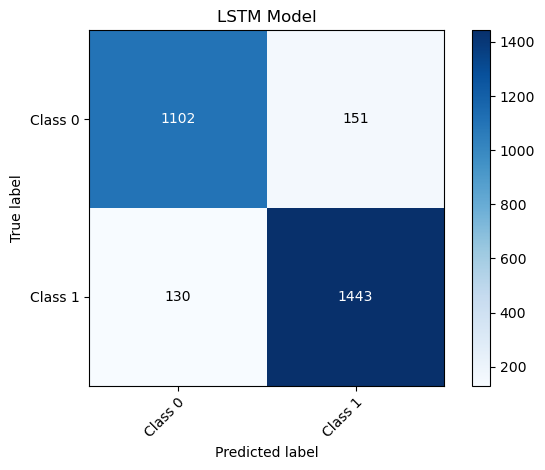

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import utils

    
utils.plot_confusion_matrix(true_classes,predicted_classes_test, ['Class 0', 'Class 1'],title='LSTM Model')


In [25]:
# Assuming 'new_texts' is a list of new texts you want to classify
new_texts = ["I an sad today", "Today is joy day"]

# Tokenize and pad the texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=50)  # Ensure this uses the same 'maxlen' as your training data


In [26]:
# Use the model to predict
predictions = model.predict(new_padded_sequences)

# Determine the predicted class based on the highest probability
predicted_classes = np.argmax(predictions, axis=1)

# Map the predicted classes to your stress labels
stress_labels = {0: "no stress", 1: "stress detected"}
predicted_stress_labels = [stress_labels[pred] for pred in predicted_classes]

# Display the results
for text, label in zip(new_texts, predicted_stress_labels):
    print(f"Text: {text}\nPredicted Label: {label}\n")


1/1 [==============================] - 0s 17ms/step
Text: I an sad today
Predicted Label: stress detected

Text: Today is joy day
Predicted Label: no stress

